In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

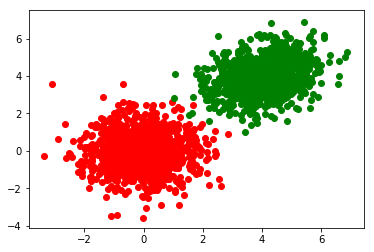

In [84]:
mean_1=[0,0]
cov_1=[[1,0],[0,1]]
mean_2=[4,4]
cov_2=[[0.8,0.2],[0.2,0.8]]
dist_1=np.random.multivariate_normal(mean_1,cov_1,1000)
dist_2=np.random.multivariate_normal(mean_2,cov_2,1000)

plt.scatter(dist_1[:,0],dist_1[:,1],color='red')
plt.scatter(dist_2[:,0],dist_2[:,1],color='green')
plt.show()

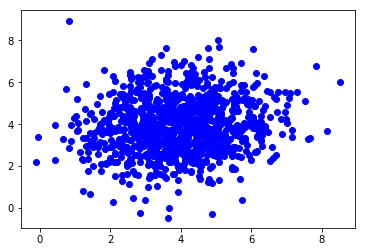

In [85]:
data=np.zeros((2000,2))
data=dist_1+dist_2
plt.scatter(data[:,0],data[:,1],color='blue')
plt.show()

In [86]:
k=2
cluster={}
centers=np.random.random((k,dist_1.shape[1]))
for ix in range(k):
    cluster[ix]={
        'center':centers[ix,:],
        'points':[]
    }
print cluster

{0: {'points': [], 'center': array([0.97649989, 0.79583729])}, 1: {'points': [], 'center': array([0.66568549, 0.86764865])}}


In [87]:
def dist(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

In [88]:
for i in range(30):
    for px in data:
        distance=[]
        for ic in range(k):
            distance.append(dist(px,cluster[ic]['center']))
        distance=np.array(distance)    
        cl_id=distance.argmin()
        #print cl_id,distance
        cluster[cl_id]['points'].append(px)
    for ix in range(k):
        cluster[ix]['center']=np.mean(cluster[ix]['points'],axis=0)

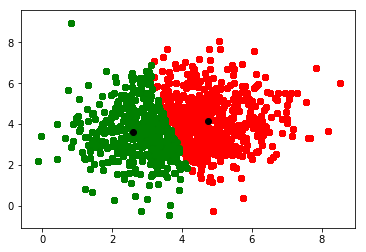

In [89]:
rgb=['red','green']
for i in range(k):
    pt_arr=np.array(cluster[i]['points'])
    plt.scatter(pt_arr[:,0],pt_arr[:,1],color=rgb[i])
    plt.scatter(cluster[i]['center'][0],cluster[i]['center'][1],color='black')